<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_okt_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok 9

<https://klajosw.blogspot.com/>


---

# Még több scipy ...

Az alábbi notebookban megismerkedünk két témával, melyek annak ellenére, hogy magukban is fontos jelentőséggel bírnak, kulcsfontosságú szerepet töltenek be más problémák numerikus megoldásában. A numerikus integrálás témakörében megvizsgálunk néhány egyszerű integrált a `scipy` csomag `quad` függvényével. A második kérdéskör, a differenciálegyenletek megoldása számos fizikai probléma vizsgálatában nyújthat segítséget. Gondoljunk csak arra, hogy a klasszikus mechanika [Newton törvényei](https://hu.wikipedia.org/wiki/Newton_t%C3%B6rv%C3%A9nyei), az elektrodinamika [Maxwell-egyenletei](https://hu.wikipedia.org/wiki/Maxwell-egyenletek), a kvantummechanika [Schrödinger-egyenlete](https://hu.wikipedia.org/wiki/Schr%C3%B6dinger-egyenlet), illetve az általános relativitáselmélet [Einstein-egyenletei](https://hu.wikipedia.org/wiki/%C3%81ltal%C3%A1nos_relativit%C3%A1selm%C3%A9let#Az_elm.C3.A9let_l.C3.A9nyege) mind-4mind differenciálegyenletek!


# Numerikus integrálás

Sok gyakorlati alkalmazásban előkerül egy fügvény integráljának, azaz a függvény görbéje alatti területnek a meghatározása. Sok analitikus függvény integrálját zárt alakban meg lehet határozni. A gyakorlatban viszont sokszor nem ismert a függvény analitikus alakja. Gondoljunk itt például egy zajos mérésre. Ilyen esetben a függvény integrálját a rendelkezésre áló mérési pontok $x_0,x_1,x_2,…x_j,…$ és mért értékek $f_0,f_1,f_2,…f_j,…$ alapján kell valahogy meghatároznunk. Ekkor az integrál értékét rendszerint egy véges összegzéssel határozhatjuk meg, ahol az összeadandó értékek a mérési pontok és a mért mennyiségek valamilyen függvényei. Az alábbiakban a `scipy` csomag `quad` függvényével fogunk megismerkedni, mely függvények numerikus integrálására alkalmas. 

## 1D integrál

In [0]:
# a szokásos rutinok betöltése
%pylab inline
from scipy.integrate import * # az integráló rutinok betöltése

Populating the interactive namespace from numpy and matplotlib


Vizsgáljuk meg az alábbi egyszerű integrált $$ \int_{-1}^1 (x^2+3x +2)\mathrm{d}x .$$ 
Ennek az értéke némi [algebrával](http://www.wolframalpha.com/input/?i=%5Cint_%7B-1%7D%5E1+%28x%5E2%2B3x+%2B2%29) $14/3\approx 4.66666$ Vajon ugyen ezt kapjuk-e a `quad` fügvénnyel ?

Először definiáljuk az integrálandó függvényt.

In [0]:
def f(x):
    return (x**2+3*x+2)

Most már meghívhatjuk a `quad`-ot. Az első változó az integrálandó függvény, a második és a harmadik pedig az integrálási határok. A kimenet két szám. Az első az integrál becsült értéke, a második az algoritmus becsült hibája.

In [0]:
quad(f,-1,1)

(4.666666666666666, 5.1810407815840634e-14)

Amint az eredmény is mutatja, ez az analitikus számítás és a numerikus integrál megegyeznek. 

Előfordulhat, hogy az integrálási határok végtelenek. Például vizsgáljuk meg a Gauss-görbe alatti területet:
$$ \int_{-\infty}^\infty \mathrm{e}^{-x^2}\mathrm{d}x =\sqrt{\pi}$$



In [0]:
# az integrandus definiálása
def gauss(x):
    return exp(-x**2)

A `quad` függvénynek a végtelen integrálási határokat az `inf` jelöléssel adhatjuk meg.

In [0]:
quad(gauss,-inf,inf)

(1.7724538509055159, 1.4202636780944923e-08)

In [0]:
sqrt(pi)

1.7724538509055159

A fent vizsgált két példával különösebb gond nélkül meg tudott birkózni a `quad`. Előfordul azonban, hogy az integrálás problémákba ütközik. Erre egy jó példa, ha az integrandus szingulárissá válik a integrálási tartomány egy pontjában. Ez nem feltétlenül jelenti azt, hogy az integrál nem létezik! Az ilyen pontokra külön felhívhatjuk a `quad` függvény figyelmét a `points` kulcsszó segítségével.

Vizsgáljuk meg a $$h(x)=\sqrt[3]{\frac{1}{(x-1)^2}}$$ függvényt mely a $x=1$ esetén divergál:

In [0]:
def h(x):
    return ((x-1.0)**(-2))**(1.0/3.0)

In [0]:
quad(h,0,2)

ZeroDivisionError: 0.0 cannot be raised to a negative power

A `quad` bizony nehézségekbe ütközik, ha a 0 reciprokát kell vennie! Specifikáljuk most az $x=1$-et mint problémás pontot:

In [0]:
quad(h,0,2,points=[1.0])

(6.000000000001056, 4.723332835965266e-12)

Így az integrál már szépen elvégezhető.

## 2D integrál

A `quad` függvény kétdimenziós változata a `dblquad`. Nézzünk két egyszerű példát kétdimenziós integrálra is!

Integráljuk a $$ \cos(x) e^{-(x^2+y^2)} $$ függvényt az alábbi két integrálási tartományon:
- egy origó központú egységnyi hosszú négyzeten 
- az origó központú egység körlapon!

In [0]:
# Az integrandus definiálása
def func(x,y):
    return cos(x)*exp(-x**2-y**2)

A `dblquad` első paramétere megint az integrálandó függvény. A második és harmadik bemenő paraméter az integrandusfüggvény első paraméterének határait adja meg. A negyedik és ötödik bemenő paraméter az első integrálási változó függvényeként kifejezve a második integrálási változó határai. A legegyszerűbb esetben ezek valamilyen konstansfüggvények. 
Az első integrálási tartomány tehát így számítható :

In [0]:
dblquad(func, -1/2, 1/2, lambda x:-1/2, lambda x:1/2)

(0.8183636555228812, 9.085661728779128e-15)

A második integrálási tartományban az $x$ változó függvényében kell paraméterezni az $y$ változó szélső értékeit. Ha az integrálási tartomány az egység sugarú körlap, akkor az alsó határt a $y(x)=-\sqrt{1-x^2}$, a felső határt pedig a $y(x)=\sqrt{1-x^2}$ adja:

In [0]:
dblquad(func,-1,1,lambda x:-sqrt(1-x**2),lambda x:sqrt(1-x**2))

(1.7860608962993605, 2.211336003199449e-09)

# Differenciálegyenletek

Amint azt a bevezetőben is említettük, a fizikai törvények jelentős része a differenciálegyenletek nyelvén van megfogalmazva. 
Az alábbiakban megismerkedünk az `odeint` rutinnal amely differenciálegyenletek numerikus megoldását tesz lehetővé. 

In [0]:
from scipy.integrate import * # ez kell a diffegyenletekhez is!!

Egy egyenletet differenciálegyenletnek hívunk, ha a meghatározandó függvény deriváltjai szerepelnek benne. Egy egyszerű differenciálegyenletre jutunk például, ha megvizsgáljuk egy kondenzátor töltésének időbeli válltozását! 
<img src="http://fizipedia.bme.hu/images/e/e0/RC_k%C3%B6r.JPG" width=300></img>


A kondenzátoron felhalmozott $Q$ töltés meghatározására induljunk ki a Kirchhoff-féle huroktörvényből, amit a fenti ábrán látható áramkörre írtunk fel:
$$ \varepsilon= \underbrace{I R}_{U_R}+ \underbrace{\frac{Q}{C}}_{U_C} = \frac{\mathrm{d}Q}{\mathrm{d}t}R+\frac{Q}{C}$$

A megoldandó differenciálegyenlet tehát:

$$ \frac{\mathrm{d}Q}{\mathrm{d}t}= \frac{\varepsilon}{R}-\frac{Q}{RC} $$

Tegyük fel, hogy a kezdetben üres volt a kondenzátor, tehát $Q(0)=0$, és számoljunk az $\varepsilon=1\mathrm{V}$, $R=1\mathrm{M}\Omega$ és $C=100nF$ paraméterekkel!

In [0]:
# Paraméterek definiálása
epsilon=1
R=1.0e6
C=1.0e-7

Az `odeint` függvény hívásához szükség van a paramétereken kívül a növekményfüggvényre (azaz a fenti egyenlet jobb oldalára), definiáljuk most ezt:

In [0]:
def RCkor(q,t):   
    return epsilon/R-q/(R*C)

Most már készen vagyunk arra, hogy meghívjuk a differenciál egyenlet megoldó függvényt! Az `odeint` alapvetően három bemenő paramétert vár. Az első a fent definiált növekményfüggvény, a második a meghatározandó függvény kezdeti értéke, a harmadik pedig azon időpontok halmaza, ahol kíváncsiak vagyunk a megoldásra. A függvény visszatérési értéke maga a keresett adatsor.

In [0]:
t=linspace(0,1,1000) # ezek az érdekes idő pillanatok
q0=0 # A töltés kezdeti értéke
q=odeint(RCkor,q0,t) # itt oldjuk meg a diffegyenletet

Most már csak ábrázolni kell!

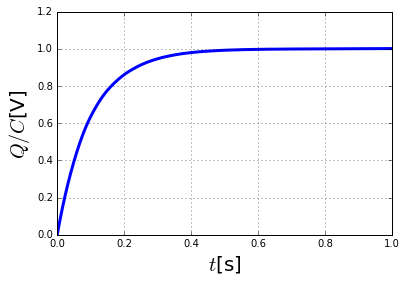

In [0]:
plot(t,q/C,lw=3)
xlabel(r'$t$[s]',fontsize=20)
ylabel(r'$Q/C$[V]',fontsize=20)
grid()

Vizsgáljunk meg egy másik példát ! Legyen ez egy rugóval rögzített test, mely egy vonal mentén súrlódás nélkül tud mozogni.
<img src="https://i1.wp.com/www.paroc.com/knowhow/sound/~/media/Images/Knowhow/Sound/The-ideal-mass-spring-system-3244099.ashx" width=300></img>

Ennek a mozgásnak az egyenlete Newton szerint, 

$$m\frac{\mathrm{d}^2x}{\mathrm{d}t^2}(t)=-kx(t)$$

Írjuk át ezt az időben másodrendű differenciálegyenletet két időben elsőrendű differenciálegyenletre! 

$$\frac{\mathrm{d}x}{\mathrm{d}t}(t)=v(t)$$

$$m \frac{\mathrm{d}v}{\mathrm{d}t}(t)=-k x(t)$$


Általában minden magasabb rendű differenciálegyenlet rendje hasonló módon csökkenthető. Azaz a legáltalánosabb esetben is új ismeretlen függvények bevezetésével elsőrendű differenciálegyenlet-rendszer megoldására tudjuk redukálni a problémánkat!

Vizsgáljuk meg azt az esetet, ha $m=k=1$ !
Most a növekményfüggvényünk egy kételemű vektort kell, hogy kezeljen!

In [0]:
def f(u, t):
    x=u[0] # az u első komponense a kitérés
    v=u[1] # az u második komponense a sebesség
        
    return  [v,-x] # ez maga a növekmény kiértékelése 

Oldjuk meg az egyenleteket úgy, hogy kezdetben a kitérés 1, a kezdősebesség pedig nulla!

In [0]:
t=linspace(0,20,1000); # az idő intervallum
u0 = [1,0] # kezdeti érték x-re és v-re
u=odeint(f,u0,t) # itt történik a diffegyenlet megoldása

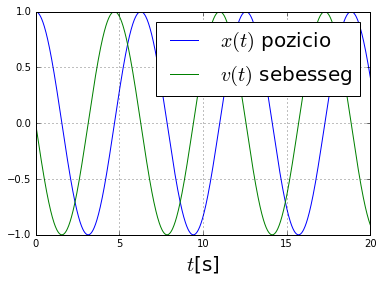

In [0]:
plot(t,u[:,0],label=r'$x(t)$ pozicio')
plot(t,u[:,1],label=r'$v(t)$ sebesseg')
legend(fontsize=20)
xlabel(r'$t$[s]',fontsize=20)
grid()